# Feature significance of the various models on Statlog (German Credit Dataset)

In [155]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier

import gensim
from gensim import corpora

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [158]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [159]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [160]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import mannwhitneyu

In [162]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
np.random.seed(42)

In [163]:
pd.set_option('display.max_columns', None)

### Retrieving the data

#### DF 5

In [164]:
df5 = pd.read_csv('df5.csv')

In [165]:
df5.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,0,4,4,1,4,4,3,2,0,3,0,9,2,1,1,2,0,1,0,1
1,1,1,7,2,4,8,0,2,1,1,0,1,0,0,2,1,0,2,0,0,0,2


#### DF 5c

In [166]:
df5c = pd.read_csv('df5c.csv')

In [167]:
df5c.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,2


#### DF7

In [168]:
#df7 = pd.read_csv('df7.csv')
df7 = pd.read_csv('df7.csv', index_col=0)

In [169]:
df7.head(2)

,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target,content
0,A11,A20,A34,A43,A51,A65,A75,A84,A93,A101,A114,A121,A139,A143,A152,A162,A173,A181,A192,A201,__label__1,__label__1 A11 A20 A34 A43 A51 A65 A75 A84 A93...
1,A12,A27,A32,A43,A58,A61,A73,A82,A92,A101,A112,A121,A130,A143,A152,A161,A173,A181,A191,A201,__label__2,__label__2 A12 A27 A32 A43 A58 A61 A73 A82 A92...


# Models

In [170]:
# Initialize lists to store evaluation metrics for each fold
dataset_used = []
model_used = []
data_balancing_technique = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

In [171]:
#combined_metrics = pd.DataFrame()

combined_metrics = pd.DataFrame(columns=['dataset', 'model', 'data balancing technique', 'fold', 'precision_1','precision_2','recall_1','recall_2','f1-score_1','f1-score_2','support_1','support_2','TP','FP','TN','FN'])

# Linear Regression

In [172]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [173]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Initialize Linear Regression model
linr = LinearRegression()
# Train the model
linr.fit(X_train, y_train)

LinearRegression()

In [175]:
# Predict and evaluate the model
y_pred = linr.predict(X_test)

y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [176]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [177]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [178]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [179]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          4786.0  0.000028     0.394522    0.204594
savings_bond_value       4249.5  0.004671     0.238199    0.123527
other_installment_plans  3972.0  0.024924     0.157343    0.081596
job                      3854.5  0.147751     0.123106    0.063841
credit_history           3847.5  0.173159     0.121066    0.062783
nr_of_existing_credits   3841.5  0.147669     0.119318    0.061877
duration                 3039.0  0.242971    -0.114510    0.059383
residence_since          3814.5  0.234738     0.111451    0.057797
credit_amount            3728.5  0.382683     0.086393    0.044802
telephone                3728.0  0.288170     0.086247    0.044727
purpose                  3710.5  0.402022     0.081148    0.042082
intallment_rate          3203.5  0.471459    -0.066579    0.034527
guarantor                3226.5  0.157041    -0.059878    0.031052
age               

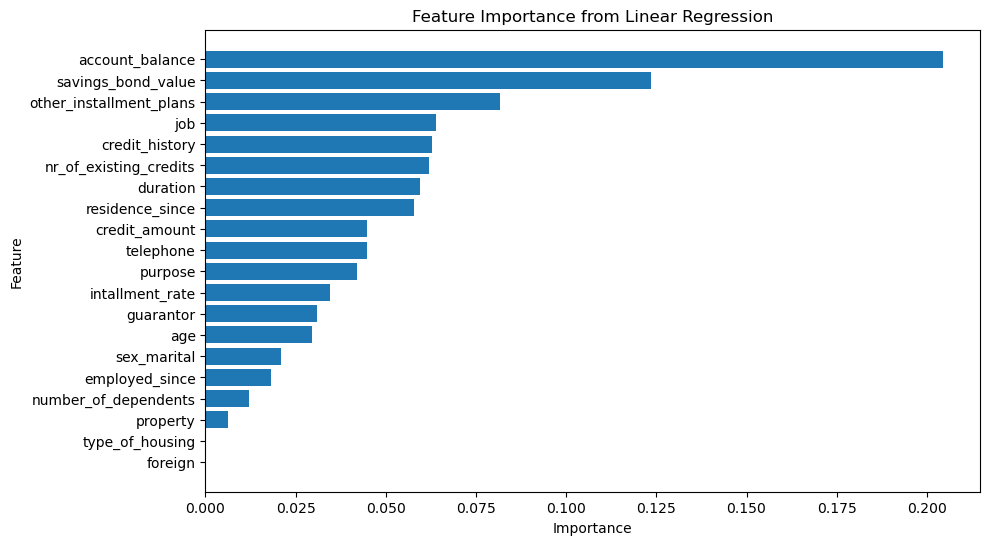

In [180]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [181]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [182]:
results_df.head(20)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression
2,other_installment_plans,3972.0,0.024924,0.157343,0.081596,3,Linear Regression
3,job,3854.5,0.147751,0.123106,0.063841,4,Linear Regression
4,credit_history,3847.5,0.173159,0.121066,0.062783,5,Linear Regression
5,nr_of_existing_credits,3841.5,0.147669,0.119318,0.061877,6,Linear Regression
6,duration,3039.0,0.242971,-0.114510,0.059383,7,Linear Regression
7,residence_since,3814.5,0.234738,0.111451,0.057797,8,Linear Regression
8,credit_amount,3728.5,0.382683,0.086393,0.044802,9,Linear Regression
9,telephone,3728.0,0.288170,0.086247,0.044727,10,Linear Regression


In [183]:
all_results_df = results_df.copy()

In [184]:
all_results_df.head(2)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression


In [185]:
'''
# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'Rank' as a column
transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df.head(2))

'''

"\n# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column\ntransformed_df = results_df.pivot(columns='model', values='feature')\n\n# Reset the index to have a simple enumeration and bring 'Rank' as a column\ntransformed_df = transformed_df.reset_index()\n\n# Display the transformed DataFrame\nprint(transformed_df.head(2))\n\n"

In [186]:
#top_features_df = transformed_df.copy()

# Logistic Regression

In [187]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [188]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Initialize Linear Regression model
logr = LogisticRegression()
# Train the model
logr.fit(X_train, y_train)

LogisticRegression()

In [190]:
# Predict and evaluate the model
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [191]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [192]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [193]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [194]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          5173.5  0.000011     0.398432    0.212010
savings_bond_value       4566.0  0.003876     0.234221    0.124631
other_installment_plans  4452.5  0.002589     0.203541    0.108306
age                      3192.0  0.149513    -0.137181    0.072995
credit_history           4158.5  0.147206     0.124071    0.066019
duration                 3333.0  0.294334    -0.099067    0.052715
type_of_housing          3411.0  0.309664    -0.077984    0.041496
residence_since          3980.5  0.400694     0.075956    0.040417
purpose                  3965.0  0.441652     0.071766    0.038188
nr_of_existing_credits   3960.0  0.375363     0.070415    0.037469
property                 3465.0  0.489400    -0.063387    0.033729
number_of_dependents     3479.5  0.368151    -0.059467    0.031643
intallment_rate          3481.0  0.507226    -0.059062    0.031428
job               

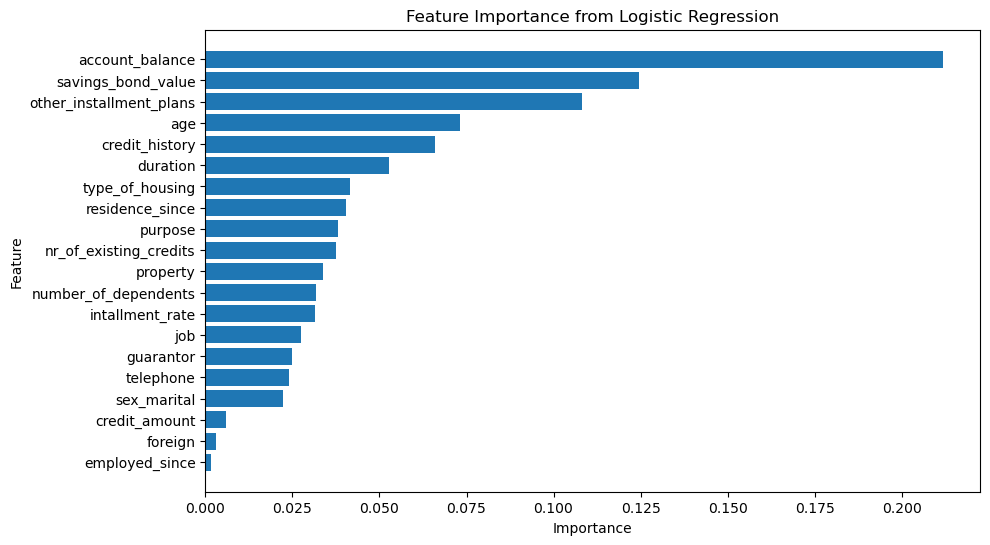

In [195]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [196]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Logistic Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [197]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) #

In [198]:
# Display the concatenated DataFrame
print(all_results_df.head(2))

              feature  u_stat   p_value  effect_size  proportion  rank  \
0     account_balance  4786.0  0.000028     0.394522    0.204594     1   
1  savings_bond_value  4249.5  0.004671     0.238199    0.123527     2   

               model  
0  Linear Regression  
1  Linear Regression  


# Decision Tree Classifier

In [199]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [200]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Initialize Linear Regression model
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
# Predict and evaluate the model
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [203]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [204]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [205]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [206]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          5040.5  0.001512     0.278666    0.143379
credit_history           4706.0  0.019374     0.193810    0.099719
savings_bond_value       4681.5  0.016961     0.187595    0.096522
nr_of_existing_credits   4543.0  0.047319     0.152461    0.078444
credit_amount            4479.0  0.139850     0.136225    0.070091
intallment_rate          3406.0  0.114541    -0.135972    0.069960
job                      4439.5  0.111681     0.126205    0.064935
age                      3518.0  0.243505    -0.107560    0.055342
other_installment_plans  4335.0  0.127925     0.099696    0.051295
type_of_housing          4306.5  0.213537     0.092466    0.047576
duration                 3671.5  0.453598    -0.068620    0.035306
guarantor                3704.5  0.126887    -0.060249    0.030999
telephone                4178.0  0.429628     0.059868    0.030803
sex_marital       

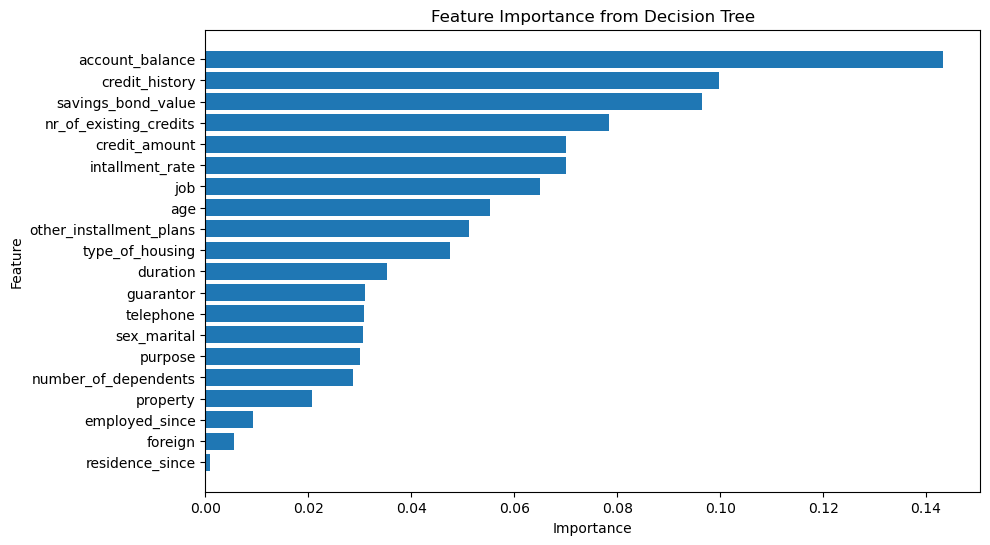

In [207]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [208]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Decision Tree Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [209]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Random Forest

In [210]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [211]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [213]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [214]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [215]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [216]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [217]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          4293.0  0.000189     0.367415    0.198520
savings_bond_value       3801.0  0.016713     0.210702    0.113846
telephone                3565.5  0.109803     0.135690    0.073316
credit_history           3564.0  0.145656     0.135213    0.073057
type_of_housing          3540.5  0.125127     0.127727    0.069013
nr_of_existing_credits   3470.5  0.221246     0.105431    0.056966
job                      3432.0  0.294998     0.093168    0.050340
sex_marital              3425.5  0.330693     0.091097    0.049221
employed_since           2869.5  0.388982    -0.086001    0.046468
guarantor                2901.5  0.086509    -0.075808    0.040960
property                 3361.5  0.477517     0.070712    0.038207
duration                 2932.5  0.520700    -0.065934    0.035625
intallment_rate          2935.5  0.501583    -0.064978    0.035109
residence_since   

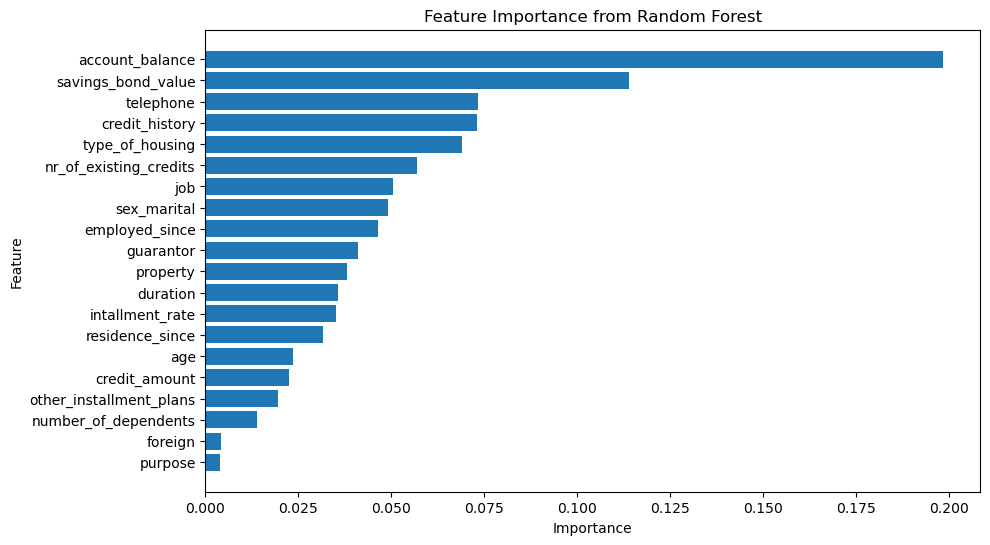

In [218]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [219]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Random Forest Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [220]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Bagged Tree Classifier

In [221]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [222]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier with Decision Tree as base estimator
btc = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)
btc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [224]:
# Predict and evaluate the model
y_pred = btc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [225]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [226]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [227]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [228]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          5124.5  0.000009     0.404742    0.201007
savings_bond_value       4510.5  0.003792     0.236431    0.117419
credit_history           4273.0  0.046796     0.171327    0.085086
residence_since          4204.5  0.093445     0.152549    0.075761
nr_of_existing_credits   4197.5  0.059431     0.150630    0.074808
telephone                4180.0  0.063882     0.145833    0.072425
job                      3973.0  0.280309     0.089090    0.044245
type_of_housing          3968.0  0.256387     0.087719    0.043564
duration                 3346.5  0.385126    -0.082648    0.041046
credit_amount            3938.0  0.407596     0.079496    0.039480
property                 3912.0  0.433107     0.072368    0.035940
employed_since           3401.5  0.465704    -0.067571    0.033558
intallment_rate          3420.5  0.486805    -0.062363    0.030971
purpose           

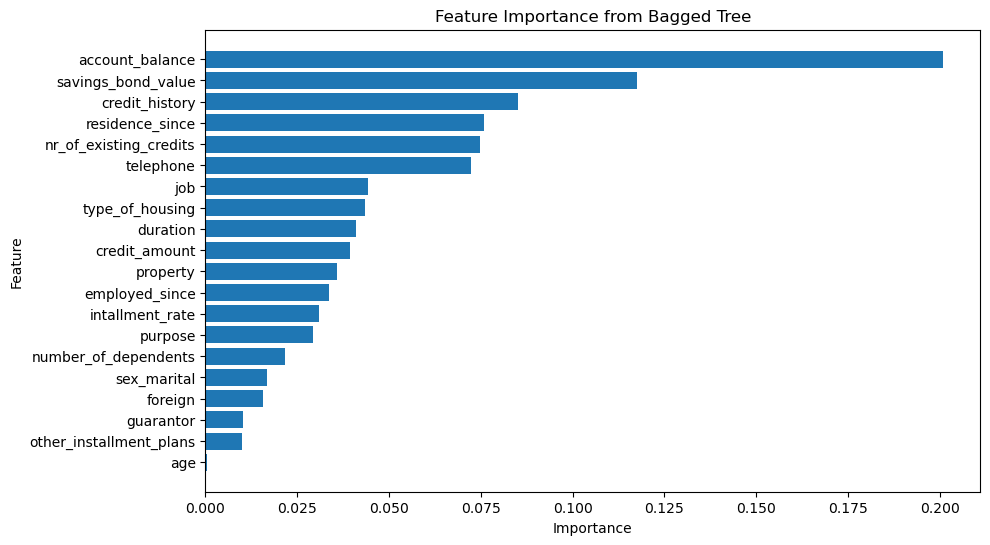

In [229]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Bagged Tree')
plt.gca().invert_yaxis()
plt.show()

In [230]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Bagged Tree Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [231]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# SVC

In [232]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [233]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# Train a Model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [235]:
# Predict and evaluate the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [236]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [237]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [238]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [239]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat       p_value  effect_size  proportion
account_balance          6009.5  3.928018e-08     0.474543    0.196136
savings_bond_value       5301.0  9.928004e-05     0.300699    0.124284
duration                 2861.0  9.196797e-04    -0.298000    0.123168
intallment_rate          3097.5  4.609902e-03    -0.239971    0.099184
telephone                4613.5  7.624264e-02     0.132008    0.054561
job                      4593.0  1.036590e-01     0.126978    0.052482
credit_history           4591.0  1.208618e-01     0.126488    0.052279
employed_since           4559.5  1.749443e-01     0.118758    0.049085
sex_marital              4557.5  1.499101e-01     0.118268    0.048882
age                      3666.5  2.685602e-01    -0.100356    0.041479
other_installment_plans  4448.5  1.553451e-01     0.091523    0.037828
nr_of_existing_credits   4361.0  3.545489e-01     0.070053    0.028954
property                 3827.0  

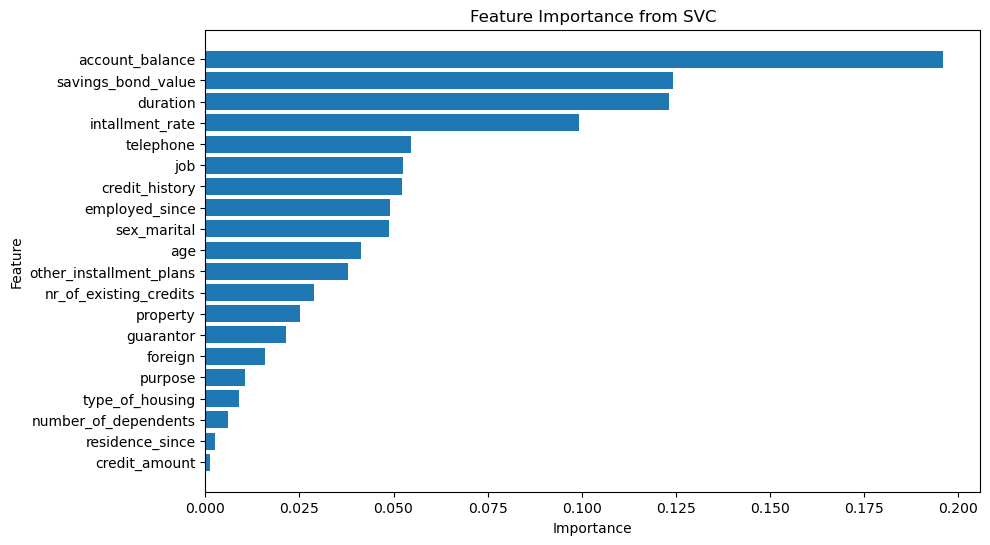

In [240]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVC')
plt.gca().invert_yaxis()
plt.show()

In [241]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'SVC'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [242]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# LightGBM

In [243]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [244]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
# Train a Model
lgbmc = lgb.LGBMClassifier()
lgbmc.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301250 -> initscore=-0.841353
[LightGBM] [Info] Start training from score -0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [246]:
# Predict and evaluate the model
y_pred = lgbmc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [247]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [248]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [249]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [250]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          3861.0  0.002419     0.307927    0.153392
credit_history           3687.5  0.009290     0.249153    0.124114
residence_since          3477.0  0.078552     0.177846    0.088593
job                      3472.0  0.054684     0.176152    0.087749
sex_marital              3426.0  0.096174     0.160569    0.079987
nr_of_existing_credits   3405.5  0.083803     0.153625    0.076527
telephone                3376.0  0.100729     0.143631    0.071549
savings_bond_value       3357.0  0.131000     0.137195    0.068343
purpose                  2611.0  0.268412    -0.115515    0.057543
other_installment_plans  3193.0  0.281071     0.081640    0.040668
credit_amount            3124.0  0.585505     0.058266    0.029025
property                 3120.5  0.578494     0.057080    0.028434
duration                 2794.5  0.614558    -0.053354    0.026578
type_of_housing   

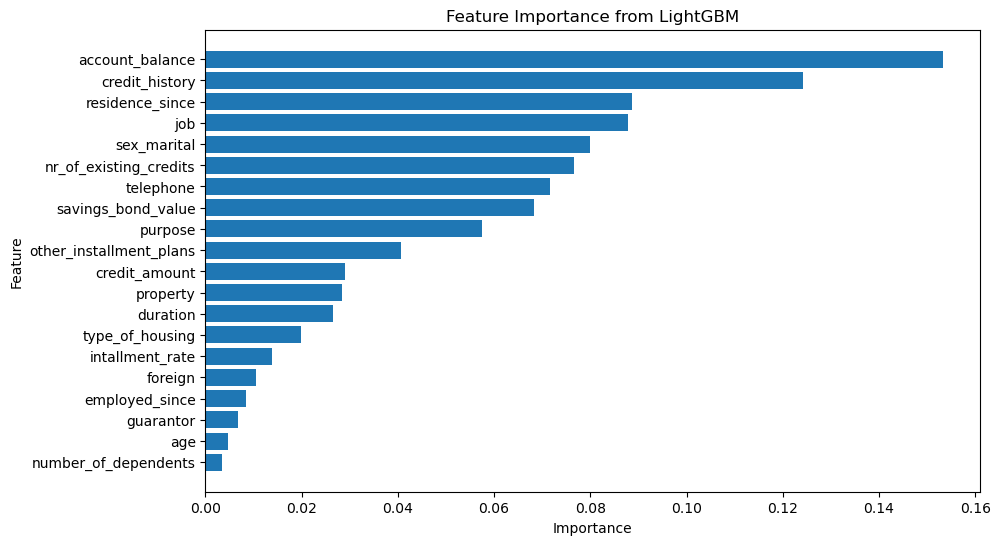

In [251]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LightGBM')
plt.gca().invert_yaxis()
plt.show()

In [252]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'LightGBM'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [253]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# XGBoost

In [254]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [255]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
# Train a Model
xgbc = XGBClassifier()

## adjust to the y_train and test to be 0,1 istead of 1 and 2
y_train = y_train - 1
y_test = y_test - 1

xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [257]:
# Predict and evaluate the model
y_pred = xgbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [258]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [259]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [260]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [261]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          4652.0  0.000720     0.313382    0.170966
savings_bond_value       4258.5  0.014673     0.202287    0.110358
telephone                4006.0  0.101020     0.130999    0.071467
intallment_rate          3109.5  0.179253    -0.122106    0.066615
duration                 3120.0  0.217114    -0.119142    0.064998
residence_since          3958.0  0.203295     0.117448    0.064074
nr_of_existing_credits   3925.0  0.182592     0.108131    0.058991
credit_history           3923.5  0.218340     0.107708    0.058760
job                      3887.0  0.244752     0.097403    0.053138
type_of_housing          3799.5  0.354181     0.072699    0.039661
other_installment_plans  3785.0  0.321081     0.068605    0.037428
property                 3781.0  0.471493     0.067476    0.036812
employed_since           3316.5  0.498328    -0.063665    0.034732
number_of_dependen

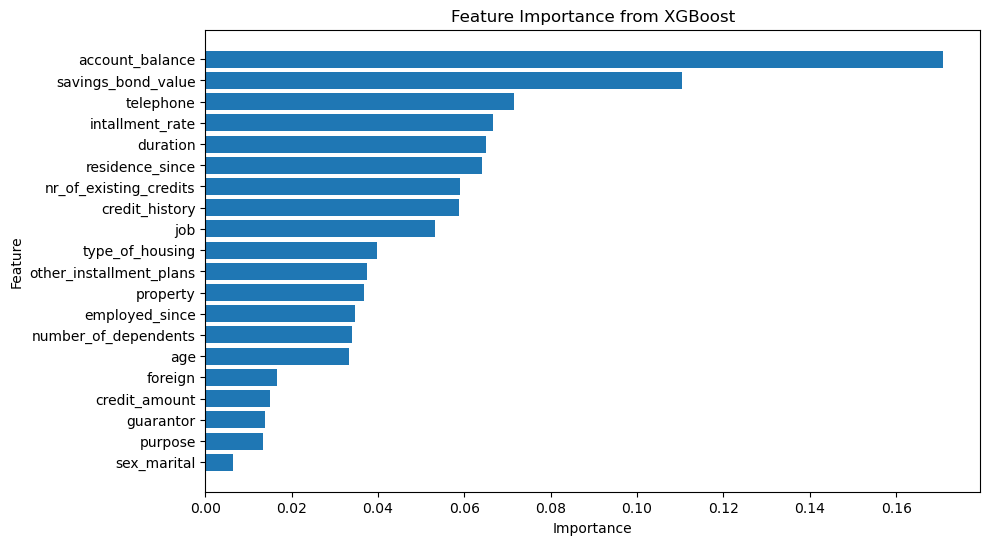

In [262]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [263]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'XGBoost'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [264]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# FastText - train_supervised

In [265]:
import fasttext

In [266]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7.drop(columns=['target','content'])  # Drop the target column to get the feature columns
y = df7['target'].astype(str)  # Target column to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a new column "content" by concatenating values from selected columns
X_train['content'] = y_train + ' ' + X_train.apply(lambda row: ' '.join(str(val) for val in row), axis=1)
X_test['content'] = X_test.apply(lambda row: ' '.join(str(val) for val in row), axis=1)

X_train = X_train['content']
X_test = X_test['content']

# Define hyperparameters
dim = 300  # Dimension of word vectors
min_count = 1  # Minimum frequency of words
loss = 'ns'  # Hierarchical softmax loss #'hs', 'ns', 'softmax'
epoch = 100  # Number of training epochs
bucket = 2000000  # Number of buckets used for hashing n-grams
word_ngrams = 1  # Maximum length of word n-grams

lr = 0.5 #0.1, 0.01, 0.001 #learning rate

X_train_list = [value for value in X_train]

# Save training data to a file
with open("train_german_fast_text.txt", "w") as f:
    for line in X_train_list:
        f.write(line + "\n")

# Training data file path
train_data_path = "train_german_fast_text.txt"

# Train the supervised model
model = fasttext.train_supervised(input=train_data_path, dim=dim, minCount=min_count,bucket=bucket, #lr=lr,
                                   loss=loss, epoch=epoch, wordNgrams=word_ngrams) #lr=lr,bucket=bucket,


# Predict on the testing set
# Initialize an empty list to store the predicted labels
y_pred_list = []

# Iterate over each data point in X_test and predict the label
for text in X_test:
    # Predict the label for the current text
    predicted_label, _ = model.predict(text)
    # Append the predicted label to the list
    y_pred_list.append(predicted_label[0])

# Convert the list of predicted labels to a pandas Series
y_pred = pd.Series(y_pred_list)

# Extract the numeric label using a lambda function
y_test = y_test.apply(lambda x: int(x.split("__label__")[1]))  ## uncomment for next run
y_pred = y_pred.apply(lambda x: int(x.split("__label__")[1]))

# Convert y_pred to an array
y_pred = np.array(y_pred)

In [267]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.77


In [269]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [270]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          4502.5  0.003433     0.271174    0.138411
intallment_rate          2769.5  0.016391    -0.218097    0.111319
credit_amount            4277.0  0.032983     0.207510    0.105915
savings_bond_value       4162.0  0.034733     0.175042    0.089344
telephone                4006.0  0.101020     0.130999    0.066864
credit_history           3990.0  0.148231     0.126482    0.064558
purpose                  3098.5  0.188678    -0.125212    0.063910
other_installment_plans  3934.0  0.109177     0.110672    0.056488
nr_of_existing_credits   3925.0  0.182592     0.108131    0.055191
number_of_dependents     3262.0  0.241542    -0.079051    0.040349
residence_since          3775.0  0.476532     0.065782    0.033576
job                      3757.0  0.468912     0.060700    0.030982
type_of_housing          3343.0  0.474231    -0.056183    0.028676
employed_since    

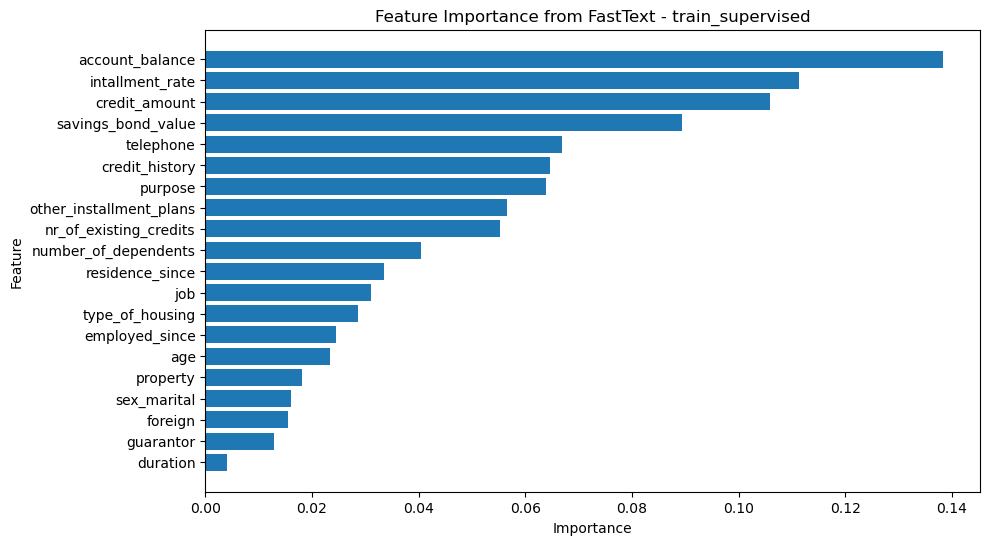

In [271]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from FastText - train_supervised')
plt.gca().invert_yaxis()
plt.show()

In [272]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'FastText - train_supervised'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [273]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# FastText - Linear Regression

In [274]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [275]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
sentences = [sentence.split() for sentence in X_train]

In [277]:
# Train the FastText model
fasttext_model = FastText(sentences, vector_size=100, window=20, min_count=2, workers=4, seed=42)

In [278]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [279]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [280]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [281]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.70


In [283]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [284]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  proportion
account_balance          5753.0  0.000014     0.369762    0.228651
other_installment_plans  4934.0  0.005848     0.174762    0.108068
intallment_rate          3553.0  0.064924    -0.154048    0.095259
duration                 3634.0  0.128344    -0.134762    0.083333
savings_bond_value       4692.5  0.123573     0.117262    0.072512
credit_history           4591.5  0.246010     0.093214    0.057641
purpose                  3823.0  0.304920    -0.089762    0.055506
credit_amount            4535.5  0.371805     0.079881    0.049396
type_of_housing          3920.0  0.354792    -0.066667    0.041225
sex_marital              3938.0  0.441124    -0.062381    0.038575
nr_of_existing_credits   4459.5  0.407229     0.061786    0.038207
number_of_dependents     4000.0  0.442688    -0.047619    0.029446
guarantor                4001.5  0.216641    -0.047262    0.029226
age               

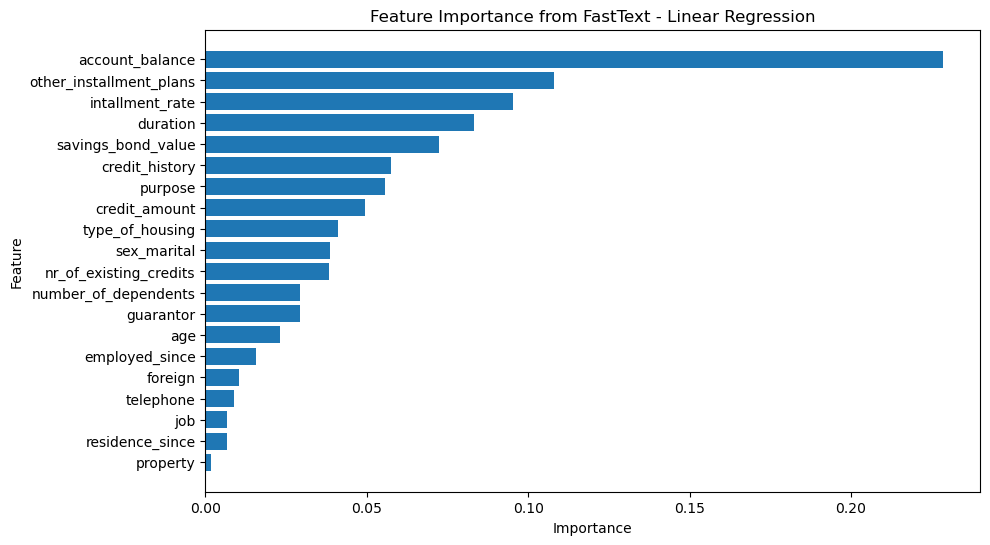

In [285]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from FastText - Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [286]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'FastText - Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [287]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Word2Vec - Linear Regression

In [288]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [289]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
sentences = [sentence.split() for sentence in X_train]

In [291]:
# Train the Word2Vec model
Word2Vec_model = Word2Vec(sentences, vector_size=100, window=10, min_count=2, workers=4, seed=42)

In [292]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [Word2Vec_model.wv[word] for word in words if word in Word2Vec_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [293]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [294]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [295]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.73


In [297]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [298]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat       p_value  effect_size  proportion
account_balance          5722.0  1.113727e-07     0.468874    0.200022
savings_bond_value       5107.5  8.237567e-05     0.311128    0.132727
duration                 2915.5  6.239080e-03    -0.251572    0.107321
intallment_rate          3060.0  1.330976e-02    -0.214478    0.091496
other_installment_plans  4564.5  9.100791e-03     0.171737    0.073263
age                      3239.5  6.938344e-02    -0.168399    0.071839
nr_of_existing_credits   4234.0  2.614166e-01     0.086895    0.037069
credit_history           4205.0  3.411175e-01     0.079451    0.033894
residence_since          4204.0  3.685150e-01     0.079194    0.033784
telephone                4197.5  3.090589e-01     0.077525    0.033072
purpose                  3595.0  3.959758e-01    -0.077140    0.032908
property                 3624.0  4.352929e-01    -0.069696    0.029732
job                      4090.5  

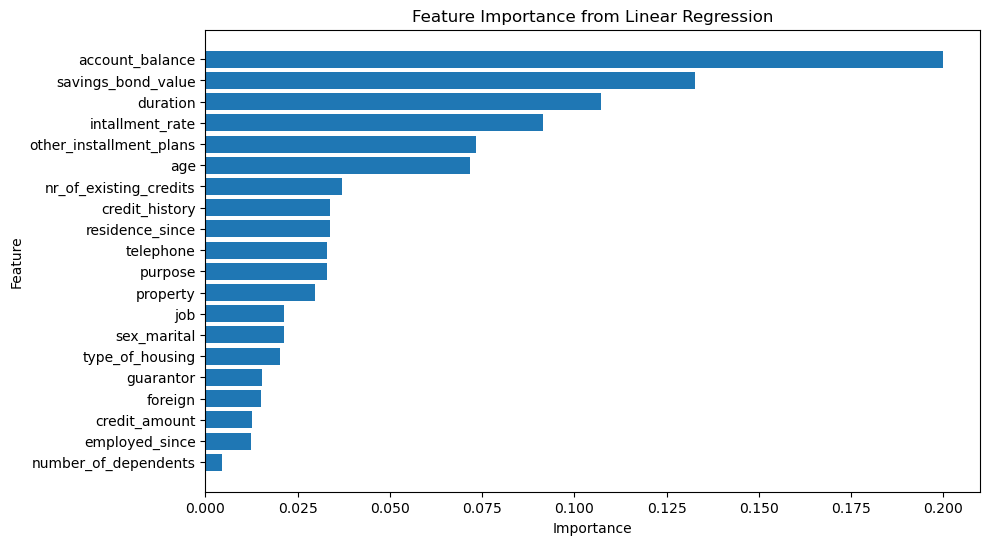

In [299]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [300]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Word2Vec - Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [301]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

In [302]:
all_results_df

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,account_balance,4786.0,0.000028,0.394522,0.204594,1,Linear Regression
1,savings_bond_value,4249.5,0.004671,0.238199,0.123527,2,Linear Regression
2,other_installment_plans,3972.0,0.024924,0.157343,0.081596,3,Linear Regression
3,job,3854.5,0.147751,0.123106,0.063841,4,Linear Regression
4,credit_history,3847.5,0.173159,0.121066,0.062783,5,Linear Regression
...,...,...,...,...,...,...,...
215,guarantor,3755.0,0.364358,-0.036067,0.015386,16,Word2Vec - Linear Regression
216,foreign,4034.0,0.287374,0.035554,0.015167,17,Word2Vec - Linear Regression
217,credit_amount,3779.0,0.748127,-0.029906,0.012758,18,Word2Vec - Linear Regression
218,employed_since,3783.5,0.748995,-0.028751,0.012265,19,Word2Vec - Linear Regression


In [303]:
results_df1 = all_results_df.copy()

In [304]:
# Set the index to 'rank'
results_df1.set_index('rank', inplace=True)

# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df1.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'rank' as a column
#transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df)

model   Bagged Tree Classifier Decision Tree Classifier  \
rank                                                      
1              account_balance          account_balance   
2           savings_bond_value           credit_history   
3               credit_history       savings_bond_value   
4              residence_since   nr_of_existing_credits   
5       nr_of_existing_credits            credit_amount   
6                    telephone          intallment_rate   
7                          job                      job   
8              type_of_housing                      age   
9                     duration  other_installment_plans   
10               credit_amount          type_of_housing   
11                    property                 duration   
12              employed_since                guarantor   
13             intallment_rate                telephone   
14                     purpose              sex_marital   
15        number_of_dependents                  purpose 

In [305]:
transformed_df[['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression']].head(5)

model,Word2Vec - Linear Regression,FastText - train_supervised,FastText - Linear Regression
rank,,,
1,account_balance,account_balance,account_balance
2,savings_bond_value,intallment_rate,other_installment_plans
3,duration,credit_amount,intallment_rate
4,intallment_rate,savings_bond_value,duration
5,other_installment_plans,telephone,savings_bond_value


In [306]:
transformed_df.loc[:, ~transformed_df.columns.isin(['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression'])].head(5)

model,Bagged Tree Classifier,Decision Tree Classifier,LightGBM,Linear Regression,Logistic Regression,Random Forest Classifier,SVC,XGBoost
rank,,,,,,,,
1,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance,account_balance
2,savings_bond_value,credit_history,credit_history,savings_bond_value,savings_bond_value,savings_bond_value,savings_bond_value,savings_bond_value
3,credit_history,savings_bond_value,residence_since,other_installment_plans,other_installment_plans,telephone,duration,telephone
4,residence_since,nr_of_existing_credits,job,job,age,credit_history,intallment_rate,intallment_rate
5,nr_of_existing_credits,credit_amount,sex_marital,credit_history,credit_history,type_of_housing,telephone,duration


In [307]:
# Group by 'feature' and calculate the mean of all other columns
average_df = all_results_df.drop(columns=['model']).groupby('feature').mean()

# Sort the resulting DataFrame by the 'rank' column in ascending order
average_df = average_df.sort_values(by='rank', ascending=True)

# Reset index to have 'feature' as a column
average_df = average_df.reset_index()

In [308]:
# Display the result
average_df.head(5)

,feature,u_stat,p_value,effect_size,proportion,rank
0,account_balance,4992.500000,0.000758,0.368131,0.186099,1.000000
1,savings_bond_value,4426.090909,0.031834,0.213706,0.106683,3.090909
2,credit_history,4139.772727,0.146913,0.138907,0.070719,5.090909
3,nr_of_existing_credits,4029.318182,0.211201,0.107898,0.054955,7.545455
4,intallment_rate,3173.227273,0.285469,-0.124146,0.061799,8.090909
